In [5]:
# https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3
import pandas as pd
import numpy as np
from fbprophet import Prophet

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

In [6]:
df = pd.read_csv('data/AirPassengers.csv')

df.head()

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
df.dtypes

Month            object
AirPassengers     int64
dtype: object

In [8]:
df.Month = pd.DatetimeIndex(df["Month"])

In [9]:
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

In [12]:
df = df.rename(columns={'Month':'ds', 'AirPassengers':'y'})
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


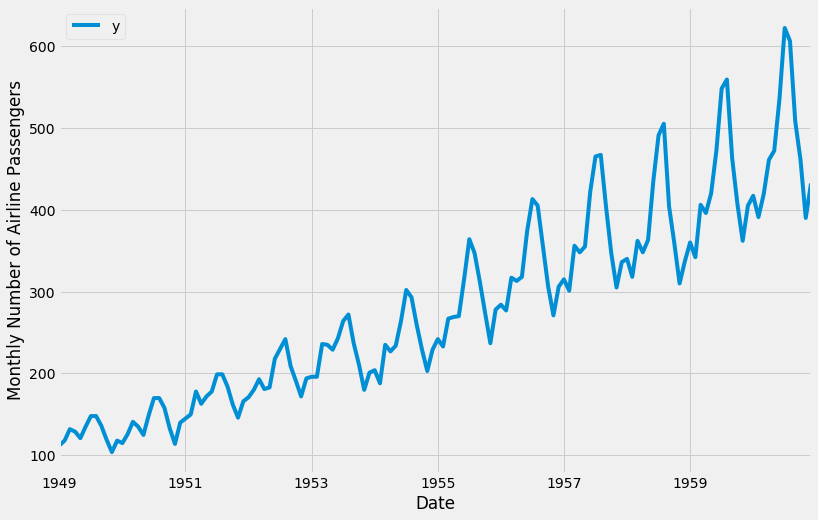

In [13]:
ax = df.set_index('ds').plot(figsize=(12,8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

In [14]:
# Set conf-int to 95%
model = Prophet(interval_width=0.95)

model.fit(df)

In [15]:
future_dates = model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [16]:
forecast = model.predict(future_dates)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,650.462543,606.998049,690.363587
176,1963-09-01,601.172892,559.446875,646.356872
177,1963-10-01,562.219535,517.428050,607.660309
178,1963-11-01,540.146249,498.280369,582.343127
179,1963-12-01,562.720708,520.027443,605.040387


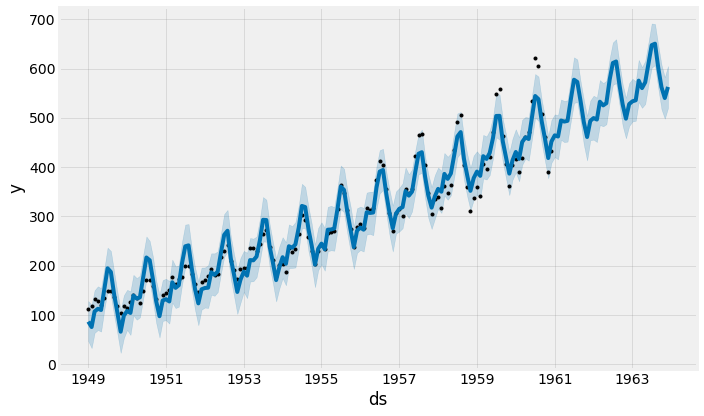

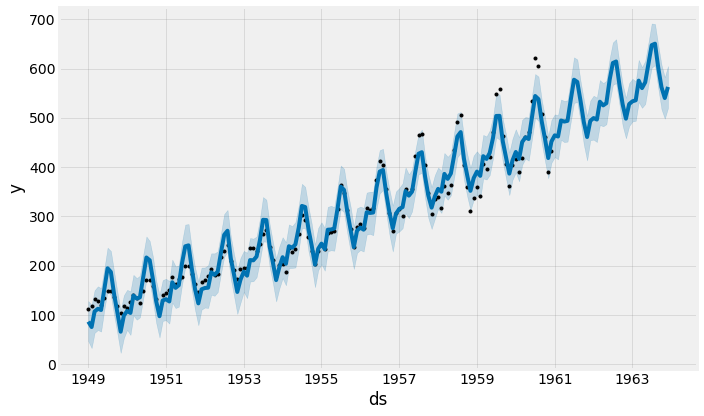

In [17]:
model.plot(forecast, uncertainty=True)

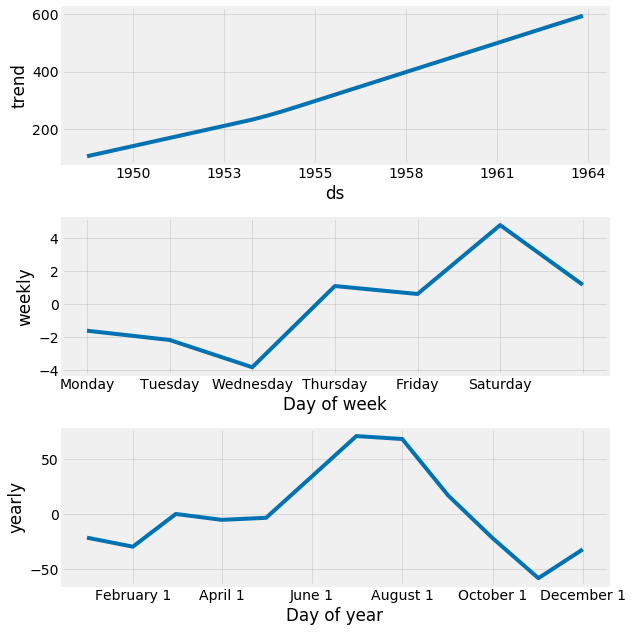

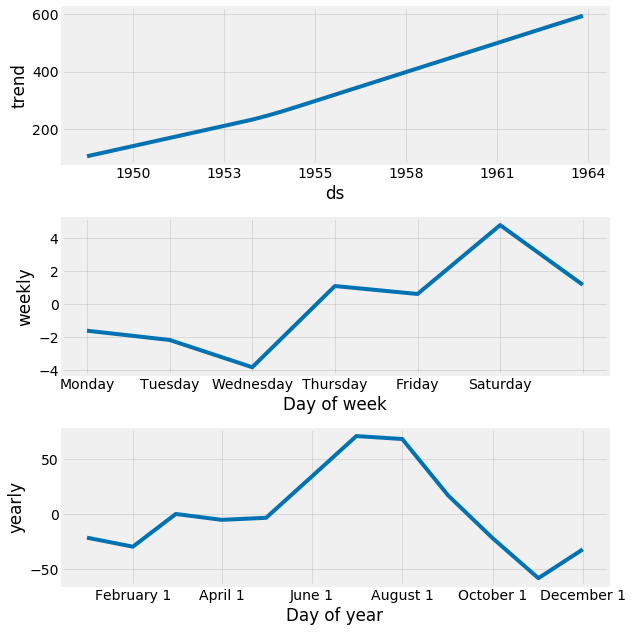

In [19]:
model.plot_components(forecast)